from google.colab import files
uploaded = files.upload()


In [3]:
from google.colab import files
uploaded = files.upload()

Saving fake reviews dataset.csv to fake reviews dataset (1).csv


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [5]:
df = pd.read_csv("fake reviews dataset.csv")

df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [21]:
df = df.dropna(subset=['text_', 'label'])
df['label'] = df['label'].astype(str)

# Convert labels to numeric (fake = 1, real = 0)
df['label_num'] = df['label'].apply(lambda x: 1 if x.lower().strip() in ['fake','cg','spam','fraud','1'] else 0)

df[['text_','label','label_num']].head()

,text_,label,label_num
0,"Love this! Well made, sturdy, and very comfor...",CG,1
1,"love it, a great upgrade from the original. I...",CG,1
2,This pillow saved my back. I love the look and...,CG,1
3,"Missing information on how to use it, but it i...",CG,1
4,Very nice set. Good quality. We have had the s...,CG,1


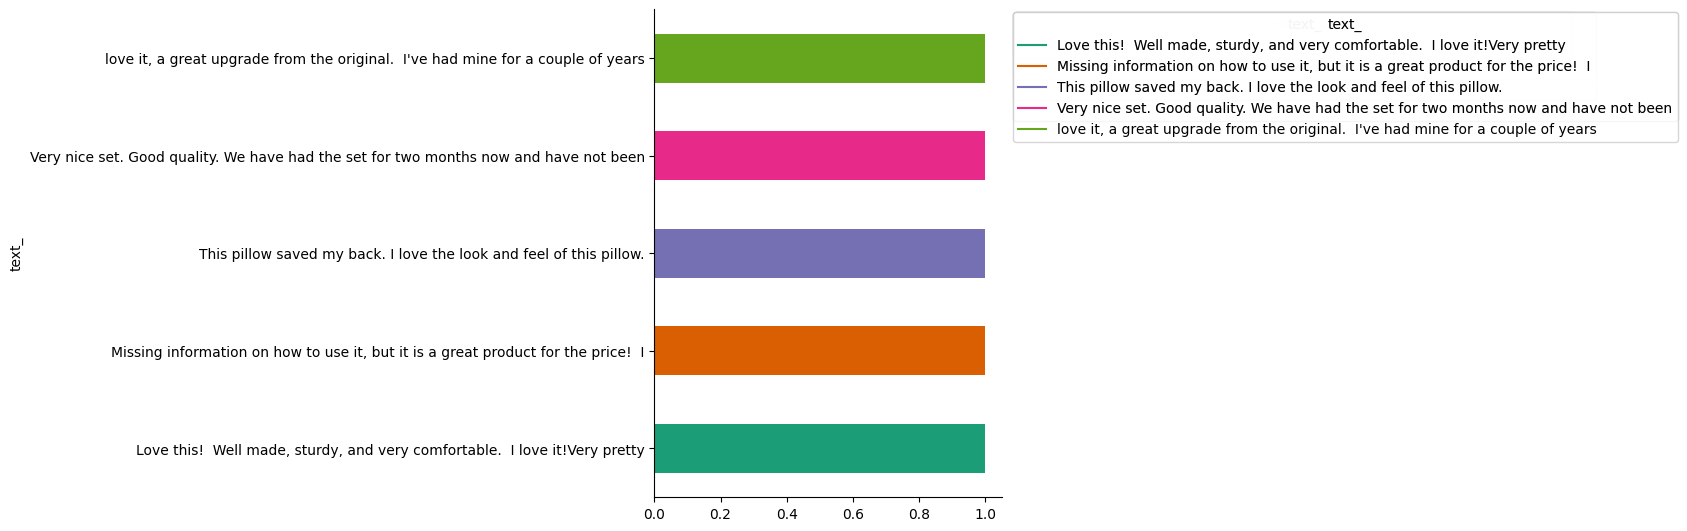

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['label_num']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'label_num'}, axis=1)
              .sort_values('label_num', ascending=True))
  xs = counted['label_num']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('label_num', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('text_')):
  _plot_series(series, series_name, i)
  fig.legend(title='text_', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('label_num')
_ = plt.ylabel('count()')
_df_0.groupby('text_').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [20]:
X = df['text_']
y = df['label_num']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [10]:
svm_model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', LinearSVC())
])

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("🔷 SVM MODEL RESULTS 🔷")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

🔷 SVM MODEL RESULTS 🔷
Accuracy: 0.8686781253864226
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      4044
           1       0.86      0.88      0.87      4043

    accuracy                           0.87      8087
   macro avg       0.87      0.87      0.87      8087
weighted avg       0.87      0.87      0.87      8087



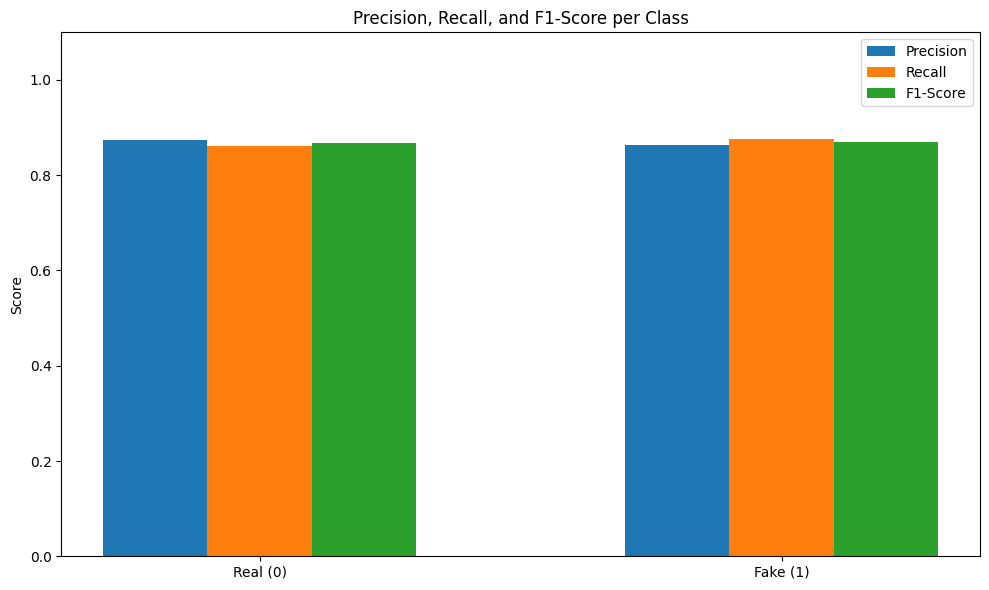

In [19]:
report = classification_report(y_test, y_pred_svm, output_dict=True)

# Extract metrics for plotting
classes = ['Real (0)', 'Fake (1)']
precision = [report['0']['precision'], report['1']['precision']]
recall = [report['0']['recall'], report['1']['recall']]
f1_score = [report['0']['f1-score'], report['1']['f1-score']]

x = range(len(classes))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar([i - width for i in x], precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar([i + width for i in x], f1_score, width, label='F1-Score')

ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1-Score per Class')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()
ax.set_ylim(0, 1.1)

plt.tight_layout()
plt.show()


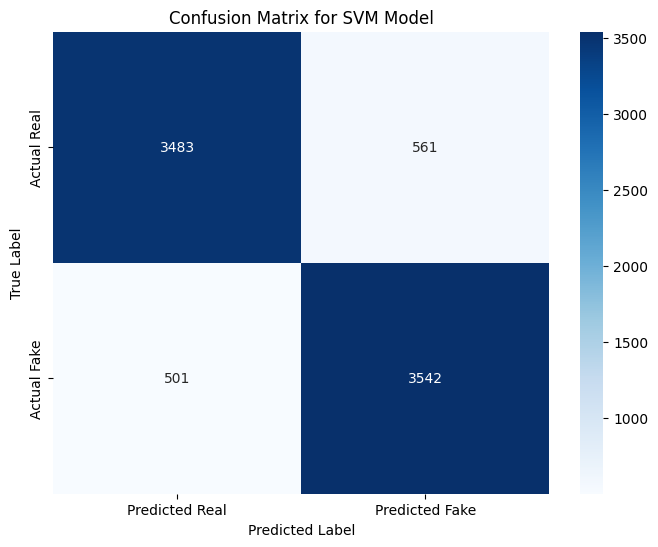

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Calculate Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Real', 'Predicted Fake'],
            yticklabels=['Actual Real', 'Actual Fake'])
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

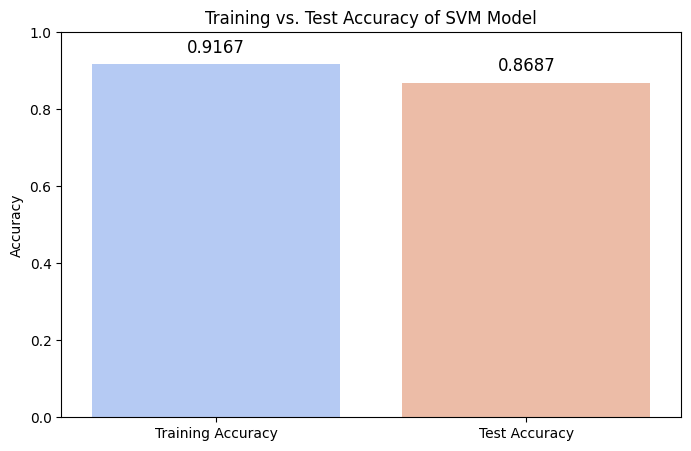

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Get predictions on the training set
y_pred_train = svm_model.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)

# Get the previously calculated test accuracy
test_accuracy = accuracy_score(y_test, y_pred_svm)

# Prepare data for plotting
accuracy_labels = ['Training Accuracy', 'Test Accuracy']
accuracy_values = [train_accuracy, test_accuracy]

# Create a bar plot for comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=accuracy_labels, y=accuracy_values, hue=accuracy_labels, palette='coolwarm', legend=False)
plt.title('Training vs. Test Accuracy of SVM Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1) # Accuracy is between 0 and 1

# Add the accuracy values on top of the bars
for index, value in enumerate(accuracy_values):
    plt.text(index, value + 0.02, f'{value:.4f}', ha='center', va='bottom', fontsize=12)

plt.show()

In [23]:
# 🔮 Test with new review
def predict_review(text):
    prediction = svm_model.predict([text])[0]
    if prediction == 1:
        return "❌ Fake Review"
    else:
        return "✔ Real Review"

# Example tests
print(predict_review("This product is Okay! Highly recommended."))
print(predict_review("Great product, must buy, very nice, good"))
print(predict_review("Worst product ever, don't buy. Total scam."))


✔ Real Review
❌ Fake Review
✔ Real Review
